In [1]:
import pandas as pd
import string
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [2]:
stopword = set(stopwords.words('english')) 
lemmatizer = WordNetLemmatizer()
tfvec = TfidfVectorizer()

In [3]:
data = pd.read_csv("WELFake_Dataset.csv")

In [4]:
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [5]:
data = data.drop('Unnamed: 0', axis=1)

In [6]:
data.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [7]:
data.fillna("Unknown", inplace=True)

In [8]:
data

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,Unknown,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


### Preprocess text

In [9]:
def preprocess_text(text):
    #Remove punctuation
    text = [char for char in text if char not in string.punctuation]
    text = ''.join(text)

    #Remove stopwords
    text = [word.lower() for word in text.split() if word.lower() not in stopword]
    text = ' '.join(text)
    return text

In [10]:
data['title'] = data['title'].apply(preprocess_text)
data['text'] = data['text'].apply(preprocess_text)


In [11]:
data

,title,text,label
0,law enforcement high alert following threats c...,comment expected barack obama members fyf911 f...,1
1,unknown,post votes hillary already,1
2,unbelievable obama’s attorney general says cha...,demonstrators gathered last night exercising c...,1
3,bobby jindal raised hindu uses story christian...,dozen politically active pastors came private ...,0
4,satan 2 russia unvelis image terrifying new ‘s...,rs28 sarmat missile dubbed satan 2 replace ss1...,1
...,...,...,...
72129,russians steal research trump hack us democrat...,washington reuters hackers believed working ru...,0
72130,watch giuliani demands democrats apologize tru...,know fantasyland republicans never questioned ...,1
72131,migrants refuse leave train refugee camp hungary,migrants refuse leave train refugee camp hunga...,0
72132,trump tussle gives unpopular mexican leader mu...,mexico city reuters donald trump’s combative s...,0


### Lemmatize Text

In [12]:
def lemma_text(text):
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

In [13]:
data['title'] = data['title'].apply(lemma_text)
data['text'] = data['text'].apply(lemma_text)


In [14]:
data

,title,text,label
0,law enforcement high alert following threat co...,comment expected barack obama member fyf911 fu...,1
1,unknown,post vote hillary already,1
2,unbelievable obama’s attorney general say char...,demonstrator gathered last night exercising co...,1
3,bobby jindal raised hindu us story christian c...,dozen politically active pastor came private d...,0
4,satan 2 russia unvelis image terrifying new ‘s...,rs28 sarmat missile dubbed satan 2 replace ss1...,1
...,...,...,...
72129,russian steal research trump hack u democratic...,washington reuters hacker believed working rus...,0
72130,watch giuliani demand democrat apologize trump...,know fantasyland republican never questioned c...,1
72131,migrant refuse leave train refugee camp hungary,migrant refuse leave train refugee camp hungar...,0
72132,trump tussle give unpopular mexican leader muc...,mexico city reuters donald trump’s combative s...,0


### Vectorize Text

In [15]:
data['Combined'] = data['title'] + ' ' + data['text']

In [16]:
data

,title,text,label,Combined
0,law enforcement high alert following threat co...,comment expected barack obama member fyf911 fu...,1,law enforcement high alert following threat co...
1,unknown,post vote hillary already,1,unknown post vote hillary already
2,unbelievable obama’s attorney general say char...,demonstrator gathered last night exercising co...,1,unbelievable obama’s attorney general say char...
3,bobby jindal raised hindu us story christian c...,dozen politically active pastor came private d...,0,bobby jindal raised hindu us story christian c...
4,satan 2 russia unvelis image terrifying new ‘s...,rs28 sarmat missile dubbed satan 2 replace ss1...,1,satan 2 russia unvelis image terrifying new ‘s...
...,...,...,...,...
72129,russian steal research trump hack u democratic...,washington reuters hacker believed working rus...,0,russian steal research trump hack u democratic...
72130,watch giuliani demand democrat apologize trump...,know fantasyland republican never questioned c...,1,watch giuliani demand democrat apologize trump...
72131,migrant refuse leave train refugee camp hungary,migrant refuse leave train refugee camp hungar...,0,migrant refuse leave train refugee camp hungar...
72132,trump tussle give unpopular mexican leader muc...,mexico city reuters donald trump’s combative s...,0,trump tussle give unpopular mexican leader muc...


In [17]:
x = tfvec.fit_transform(data['Combined'])

In [18]:
y = data['label']

### Split data

In [19]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=.3, random_state=42)

### Training Model & Evaluate

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

In [21]:

def evmodel(models):
    best_performance_model = ''
    Tscore = 0
    for model in models:
        model.fit(xTrain, yTrain)
        pred = model.predict(xTest)
        score = accuracy_score(yTest, pred)
        conf = confusion_matrix(yTest, pred)
        print(f"Model: {type(model).__name__} \n Accuracy Score: {score} \n Confusion Score:\n {conf}")
    
        # Create a heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf, annot=True, fmt='d', cmap='RdBu',
                    xticklabels=['Predicted 0', 'Predicted 1'],
                    yticklabels=['Actual 0', 'Actual 1'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()
    
        predicted_probabilities = model.predict_proba(xTest)[:, 1] 
        plt.figure(figsize=(8, 6))
        sns.histplot(predicted_probabilities, bins=20, kde=True)
        plt.title('Distribution of Predicted Probabilities')
        plt.xlabel('Predicted Probability')
        plt.ylabel('Frequency')
        plt.show()
    
        fpr, tpr, thresholds = roc_curve(yTest, predicted_probabilities)
        auc = roc_auc_score(yTest, predicted_probabilities)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.grid()
        plt.show()

        if Tscore < score:
            best_performance_model = model
            Tscore = score
    return best_performance_model

Model: LogisticRegression 
 Accuracy Score: 0.9534217457603623 
 Confusion Score:
 [[10028   585]
 [  423 10605]]


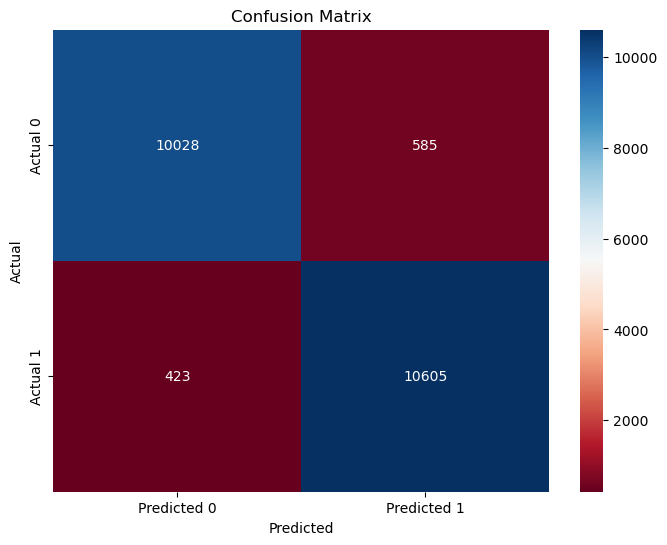

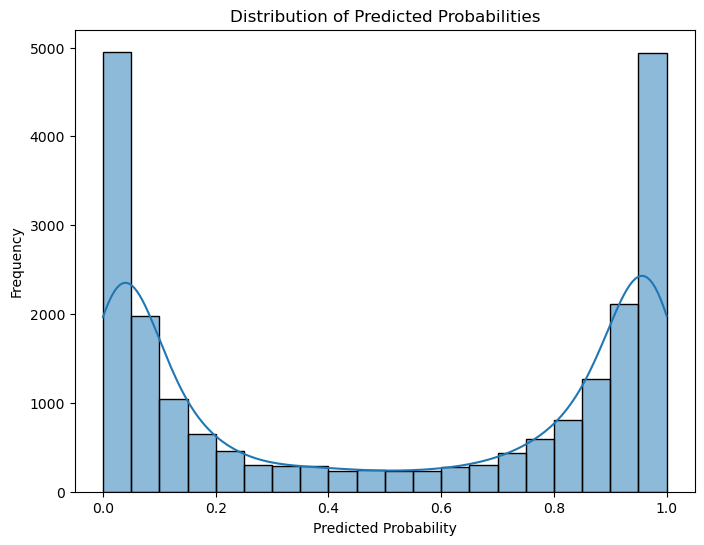

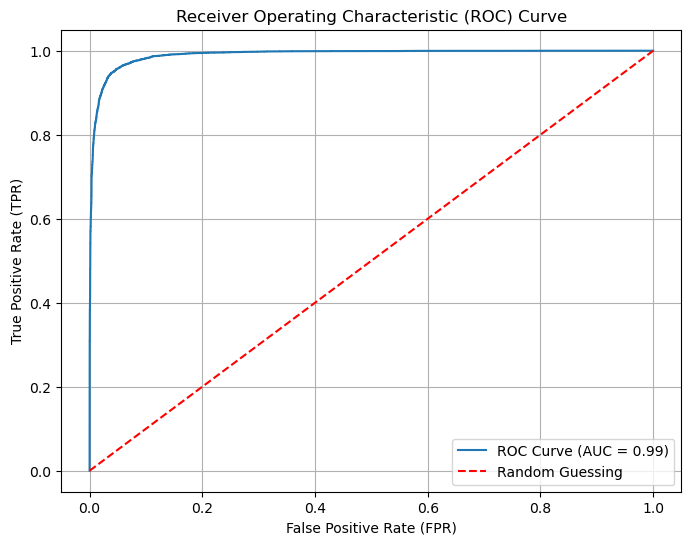

Model: BernoulliNB 
 Accuracy Score: 0.8610507832355252 
 Confusion Score:
 [[8722 1891]
 [1116 9912]]


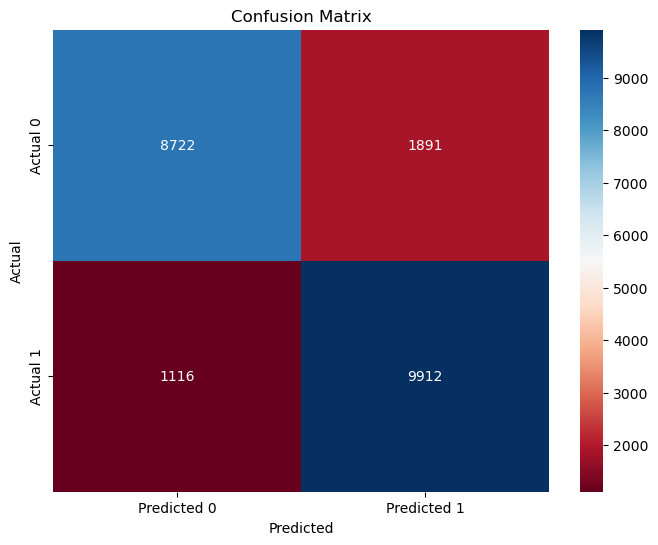

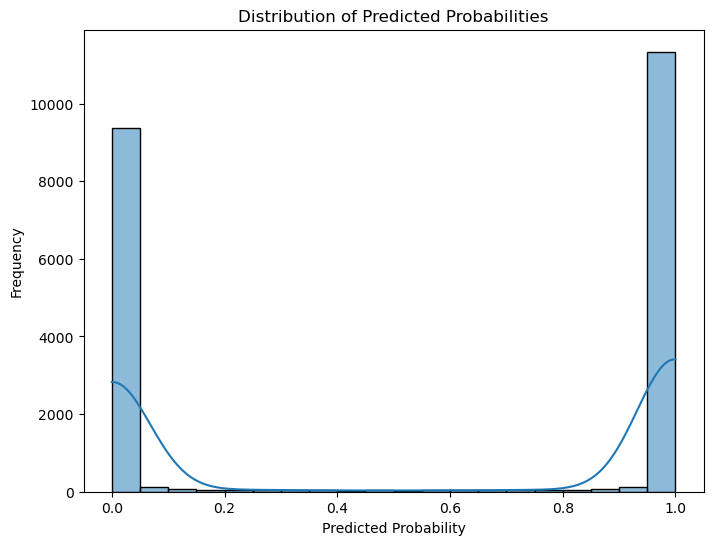

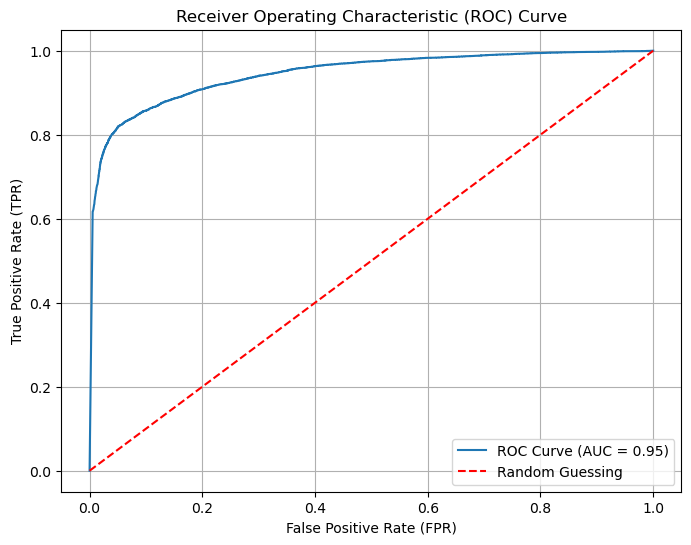

Model: MultinomialNB 
 Accuracy Score: 0.8774548311076198 
 Confusion Score:
 [[9556 1057]
 [1595 9433]]


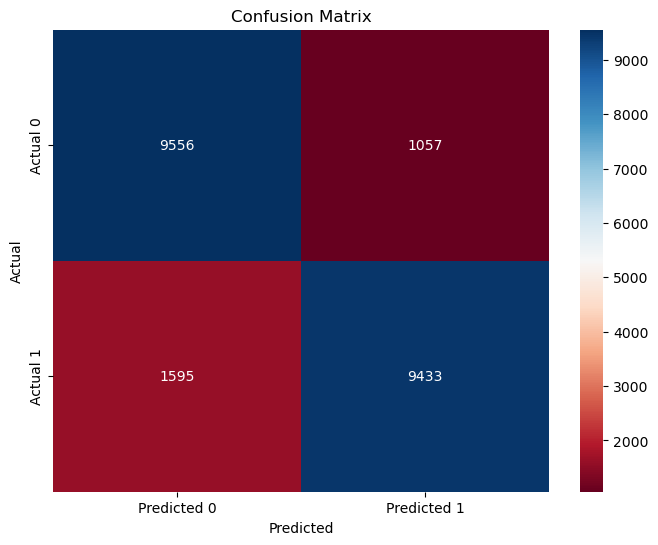

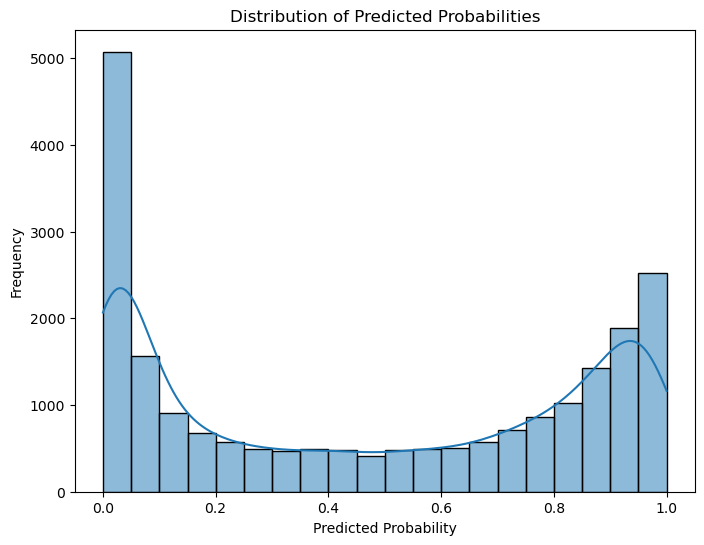

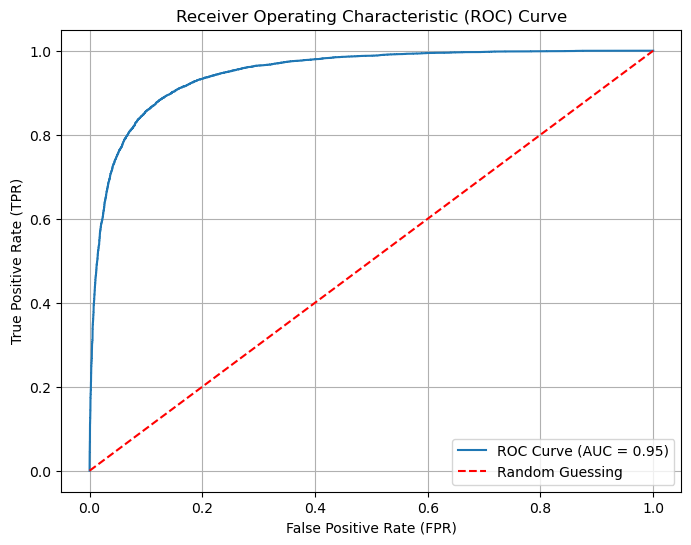

In [22]:
models = [LogisticRegression(), BernoulliNB(), MultinomialNB()]
model_should_i_use_for_pred = evmodel(models)

In [23]:
model_should_i_use_for_pred

LogisticRegression()

# Triaing Model for input prediction 

In [64]:
mod = model_should_i_use_for_pred
mod.fit(x, y)

LogisticRegression()

## From input

In [86]:
title = input("Type Title: ")
text = input("Type Text: ")
inp = title + ' ' + text
inp = preprocess_text(inp)
inp = lemma_text(inp)
inp = tfvec.transform([inp])
result = mod.predict(inp)
if result == 1:
    print("\n\n\t\t --------------------REAL NEWS--------------------")
elif result == 0:
    print("\n\n\t\t--------------------FAKE NEWS--------------------")


Type Title:  President Obama says the United States will respond to Russian cyberattacks that the intelligence community has concluded were part of an effort to influence the 2016 presidential election.  In an interview with NPR's Steve Inskeep that is airing Friday on Morning Edition, Obama said, "I think there is no doubt that when any foreign government tries to impact the integrity of our elections ... we need to take action. And we will — at a time and place of our own choosing. Some of it may be explicit and publicized; some of it may not be."
Type Text:  "The irony of all this, of course, is that for most of my presidency, there's been a pretty sizable wing of the Republican Party that has consistently criticized me for not being tough enough on Russia," he said. "Some of those folks during the campaign endorsed Donald Trump, despite the fact that a central tenet of his foreign policy was we shouldn't be so tough on Russia. And that kind of inconsistency I think makes it appear,



		--------------------FAKE NEWS--------------------
